### **Imports**

In [1]:
# importing the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### **Fetching Datasets**

In [2]:
# fetching dataset - 1
df1 = pd.read_csv(r"C:\Users\vaibh\OneDrive\Desktop\Tsk 2\1_ev_charger_dataset (1).csv")
df1.head()

,Region,2W,3W,4W,Bus,Chargers
0,Uttar Pradesh,9852,42881,458,197,207
1,Maharastra,38558,893,1895,186,317
2,Karnataka,32844,568,589,57,172
3,Tamil Nadu,25642,396,426,0,256
4,Gujarat,22359,254,423,22,228


In [3]:
# fetching dataset - 2
df2 = pd.read_excel(r"C:\Users\vaibh\OneDrive\Desktop\Tsk 2\2_ev_charging_station_dataset (1).xlsx", sheet_name='Table 4', header=1)
df2.head()

,State/UT,EV Charging Facility
0,Andhra Pradesh,65
1,Arunachal Pradesh,4
2,Assam,19
3,Bihar,26
4,Chandigarh,4


### **Exploratory Data Analysis (EDA)**

### *Analysing the datasets*

In [4]:
# checking the shape (# of rows and columns) of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)


DF1 Shape:  (24, 6)
DF2 Shape:  (31, 2)


In [5]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 -----------------------------------------------------------')
print(df1.info())
print(' <<< DATASET 2 -----------------------------------------------------------')
print(df2.info())


 <<< DATASET 1 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Region    24 non-null     object
 1   2W        24 non-null     int64 
 2   3W        24 non-null     int64 
 3   4W        24 non-null     int64 
 4   Bus       24 non-null     int64 
 5   Chargers  24 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.2+ KB
None
 <<< DATASET 2 -----------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   State/UT              31 non-null     object
 1   EV Charging Facility  31 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 624.0+ bytes
None


In [6]:
# getting a statistical summary of the datasets
d1 = df1.describe()
d2 = df2.describe()
display('<<< DATASET 1 >>>', d1, '<<< DATASET 2 >>>', d2)

'<<< DATASET 1 >>>'

,2W,3W,4W,Bus,Chargers
count,24.000000,24.000000,24.000000,24.000000,24.000000
mean,8421.458333,3853.166667,334.041667,28.500000,106.791667
std,10942.261145,8850.690961,476.930628,63.771331,96.623869
min,187.000000,234.000000,12.000000,0.000000,10.000000
25%,848.000000,512.750000,34.750000,0.000000,25.000000
50%,2967.500000,931.000000,129.000000,0.000000,67.500000
75%,10697.750000,2659.250000,434.000000,5.500000,180.250000
max,38558.000000,42881.000000,1895.000000,197.000000,317.000000


'<<< DATASET 2 >>>'

,EV Charging Facility
count,31.000000
mean,49.548387
std,50.768651
min,1.000000
25%,4.000000
50%,26.000000
75%,81.500000
max,174.000000


### *Analysis of 2-wheeler EVs*
Observation: Maharashtra, Gujarat, Tamilnadu, Karnataka and Andhra Pradesh are among the top states with the majority of EV 2-wheelers while Assam, Himachal Pradesh, Sikkim, J&K with the least.


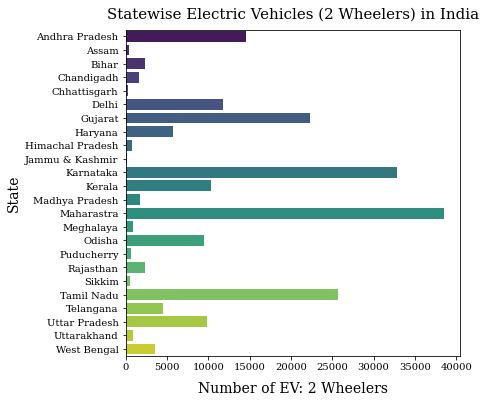

In [7]:
# 2 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='2W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 2 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (2 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis of 3-wheeler EVs*
Observation: Uttar Pradesh, Assam and Bihar are among the top states with the majority of EV 3-wheelers while the remaining states don't seem to depend on the same.

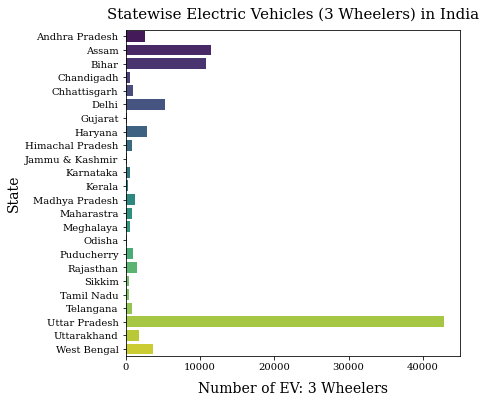

In [8]:
# 3 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='3W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 3 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (3 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis 4-wheeler EVs*
Observation: Maharashtra, Delhi, Karnataka, Kerala and Andhra Pradhesh are among the top states with the majority of EV 4-wheelers while the remaining states have less number of EV 4-wheelers.

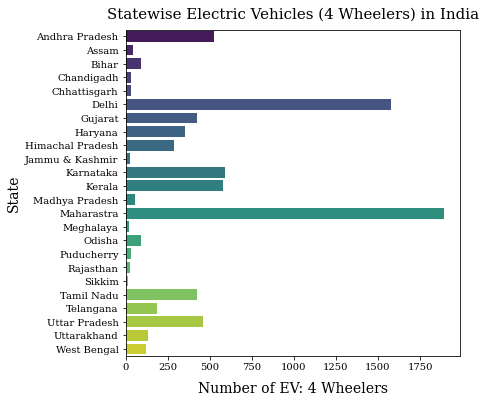

In [9]:
# 4 wheelers data visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='4W', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of EV: 4 Wheelers', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Statewise Electric Vehicles (4 Wheelers) in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis of charging stations sanctioned*
Observation: Maharashtra, Gujarat, Karnataka, Kerala, Uttar Pradesh, Rajasthan, and Andhra Pradhesh are among the top states with the majority of EV charging stations sanctioned while the remaining states have less number of the same.

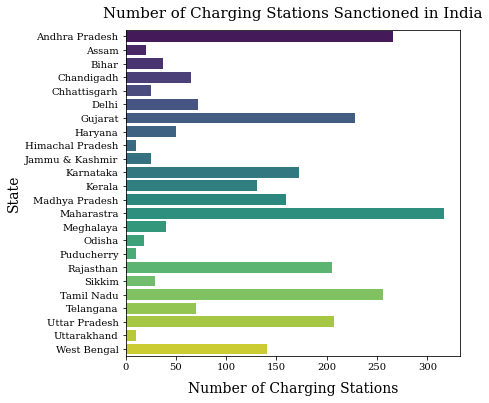

In [10]:
# charging stations sanctioned visualization from dataset 1
plt.figure(figsize=(6, 6))
sns.barplot(data=df1, y=df1['Region'].sort_values(ascending=True), x='Chargers', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations Sanctioned in India', weight=200, family='serif', size=15, pad=12)
plt.show()

### *Analysis of retail outlets for EV charging*
Observation: Rajasthan, Madhya Pradesh, Maharashtra, Karnataka, Uttar Pradesh are among the top states with the majority of retail outlets for EV charging while the remaining states have less number of the same.

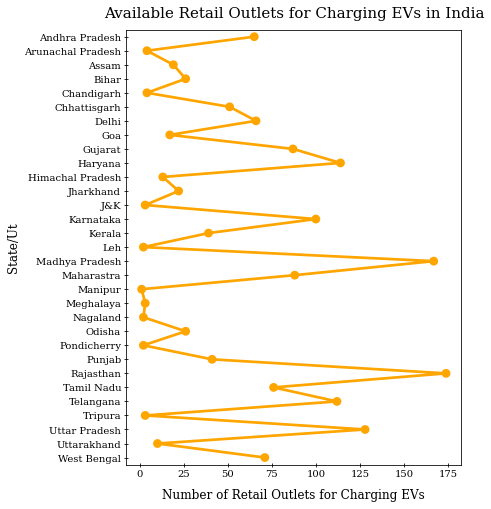

In [11]:
# retail outlets visualization from dataset - 2
plt.figure(figsize=(6, 8))
sns.pointplot(data=df2, y='State/UT', x='EV Charging Facility', color='orange')
plt.xlabel('Number of Retail Outlets for Charging EVs', family='serif', size=12, labelpad=10)
plt.ylabel('State/Ut', family='serif', size=12)
plt.tick_params(direction='inout')
plt.xticks(family='serif', size=10)
plt.yticks(family='serif', size=10)
plt.title(label='Available Retail Outlets for Charging EVs in India', weight=200, family='serif', size=15, pad=12)
plt.show()